In [1]:
import pandas as pd
import glob
import os
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA


In [2]:
generos = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction', 'TVMovie', 'Thriller', 'War', 'Western']

def read_parquet(pasta):
    arquivos_parquet = glob.glob(os.path.join(pasta, '*.parquet'))
    lista_df = [pd.read_parquet(arquivo) for arquivo in arquivos_parquet]
    df = pd.concat(lista_df, ignore_index=True)
    return df

In [5]:
df_parquet = read_parquet('./preprocess/movies')[generos]
label = 'Action'
features = generos.copy()
features.remove(label)

In [6]:
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(df_parquet[features], df_parquet[label])

In [8]:
# Definir e treinar o modelo Random Forest
model = RandomForestClassifier(criterion='entropy',random_state=42)
model.fit(X, y)

# Obter a importância das features
importances = model.feature_importances_

# Criar um dataframe para visualizar as importâncias
importancia_df = pd.DataFrame({'Gênero': features, 'Importância': importances})

# Ordenar as importâncias do maior para o menor
importancia_ordenada = importancia_df.sort_values(by='Importância', ascending=False)

# Definir um threshold (por exemplo, selecionar importância acima de 0.05)
threshold = 0.06
generos_selecionados = importancia_ordenada[importancia_ordenada['Importância'] > threshold]
X = X[generos_selecionados['Gênero']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500], 
    'max_features': [ 'sqrt', 'log2', None],  
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  
    scoring='precision',  
    n_jobs=-1, 
    verbose=2
)

In [15]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best Parameters:")
print(best_params)

y_pred = best_rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.6s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.8s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.4s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.4s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.5s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.5s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ................max_features=sqrt, n_estimators=300; total time=   2.1s
[CV] END ................max_features=sqrt, n_es

In [16]:
from sklearn.feature_selection import SelectKBest, chi2

# Seleção das melhores características
selector = SelectKBest(chi2, k=5)
selector.fit(X, y)

X = selector.get_feature_names_out()
print("Os 5 gêneros mais relevantes são:", generos_selecionados)

Os 5 gêneros mais relevantes são: ['Adventure' 'Documentary' 'Thriller' 'Drama' 'Crime']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [20]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best Parameters:")
print(best_params)

y_pred = best_rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.8s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.3s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.3s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.4s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ................max_features=sqrt, n_estimators=300; total time=   2.1s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ................max_features=sqrt, n_es

In [25]:
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(df_parquet[features], df_parquet[label])
X_train, X_test, y_train, y_test = train_test_split(df_parquet[features], df_parquet[label], test_size=0.2, random_state=42, stratify=df_parquet[label])

In [26]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best Parameters:")
print(best_params)

y_pred = best_rf.predict(X_test_pca)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ................max_features=sqrt, n_estimators=100; total time=   7.8s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   8.0s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   9.2s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   9.3s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   9.5s
[CV] END ................max_features=sqrt, n_estimators=200; total time=  17.1s
[CV] END ................max_features=sqrt, n_estimators=200; total time=  17.1s
[CV] END ................max_features=sqrt, n_estimators=200; total time=  17.2s
[CV] END ................max_features=sqrt, n_estimators=200; total time=  17.4s
[CV] END ................max_features=sqrt, n_estimators=200; total time=  17.4s
[CV] END ................max_features=sqrt, n_estimators=300; total time=  25.6s
[CV] END ................max_features=log2, n_es

In [24]:
y_pred = best_rf.predict(X_test_pca)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      6509
           1       0.61      0.34      0.44      1199

    accuracy                           0.86      7708
   macro avg       0.75      0.65      0.68      7708
weighted avg       0.84      0.86      0.85      7708



In [ ]:
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(df_parquet[features], df_parquet[label])
X_train, X_test, y_train, y_test = train_test_split(df_parquet[features], df_parquet[label], test_size=0.2, random_state=42, stratify=df_parquet[label])

In [28]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best Parameters:")
print(best_params)

y_pred = best_rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ................max_features=sqrt, n_estimators=100; total time=   4.9s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   4.9s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   5.2s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   5.2s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   5.5s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   9.4s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   9.6s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   9.6s
[CV] END ................max_features=sqrt, n_estimators=200; total time=  10.2s
[CV] END ................max_features=sqrt, n_estimators=200; total time=  10.1s
[CV] END ................max_features=sqrt, n_estimators=300; total time=  14.5s
[CV] END ................max_features=log2, n_es

In [29]:
metrics = ['F1 Score', 'Accuracy', 'Recall', 'Precision']
methods = ['Todas Features', 'PCA', 'SelectKBest', 'RandomForestClassifier']

In [30]:
scores = {
    'Todas Features': [0.675, 0.86, 0.65, 0.75],
    'PCA': [0.68, 0.86, 0.64, 0.55],
    'SelectKBest': [0.75,0.75,0.75,0.75],
    'RandomForestClassifier': [0.75,0.75,0.75,0.75]
}

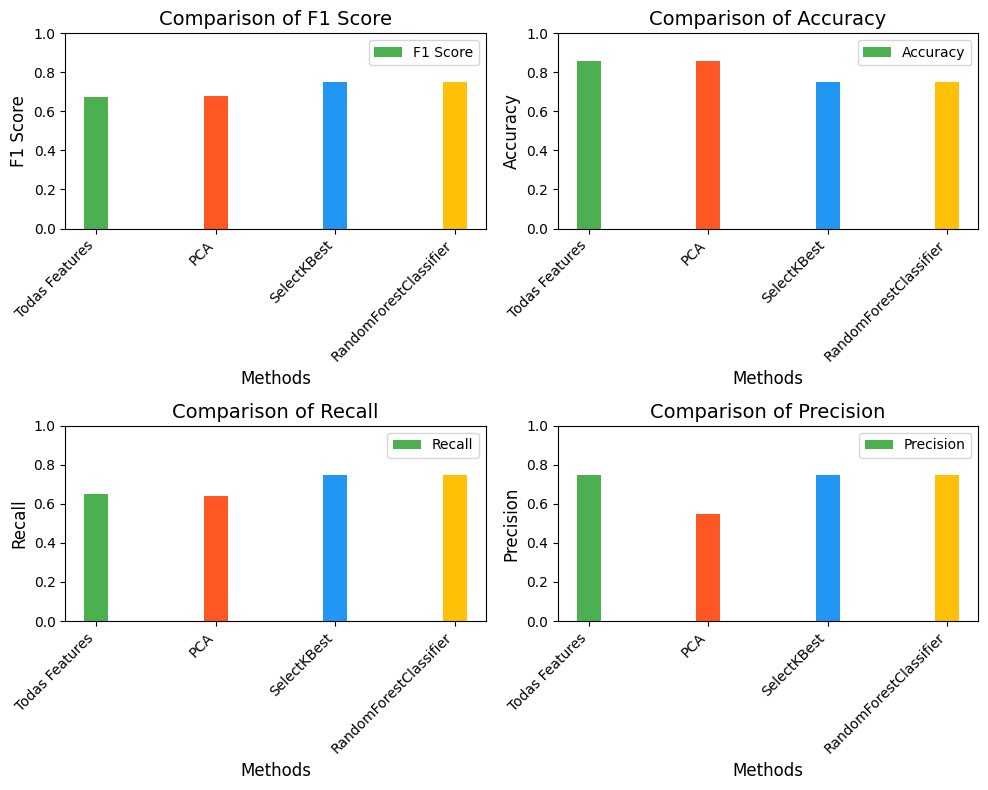

In [31]:
import matplotlib.pyplot as plt
# Convertendo para uma matriz para facilitar os gráficos
scores_matrix = np.array([scores[method] for method in methods])

# Passo 2: Criar os gráficos de barra para cada métrica
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Configura uma grade 2x2 para os gráficos

# Definir posição para os métodos
bar_width = 0.2  # Largura das barras
index = np.arange(len(methods))

# Gerando um gráfico de barra para cada métrica
for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)  # Define a posição do gráfico na grade
    axs[row, col].bar(index, scores_matrix[:, i], bar_width, label=metric, color=['#4CAF50', '#FF5722', '#2196F3', '#FFC107'])
    axs[row, col].set_title(f'Comparison of {metric}', fontsize=14)
    axs[row, col].set_xlabel('Methods', fontsize=12)
    axs[row, col].set_ylabel(metric, fontsize=12)
    axs[row, col].set_xticks(index)
    axs[row, col].set_xticklabels(methods, rotation=45, ha="right")
    axs[row, col].set_ylim(0, 1)  # Assuming metrics are normalized between 0 and 1
    axs[row, col].legend()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

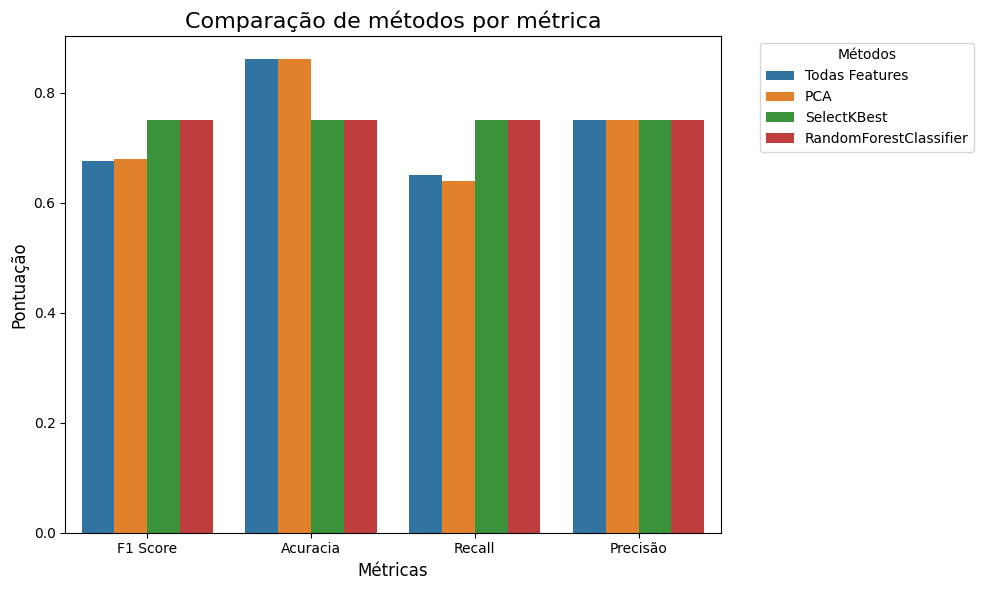

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Organize os dados em um DataFrame
df = pd.DataFrame({
    'Metodos': ['Todas Features', 'PCA', 'SelectKBest', 'RandomForestClassifier'],
    'F1 Score': [0.675, 0.68, 0.75, 0.75],
    'Acuracia': [0.86, 0.86, 0.75, 0.75],
    'Recall': [0.65, 0.64, 0.75, 0.75],
    'Precisão': [0.75, 0.75, 0.75, 0.75]
})

# Melt the DataFrame for seaborn compatibility
df_melted = df.melt(id_vars='Metodos', var_name='Metricas', value_name='Pontuação')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Metricas', y='Pontuação', hue='Metodos', data=df_melted)

plt.title('Comparação de métodos por métrica', fontsize=16)
plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Pontuação', fontsize=12)
plt.legend(title='Métodos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
